## Dataset description:

<b>end_song_sample.csv</b>
<br/>
- ms_played -- the amount of time the user listened to this track, in milliseconds
- context -- the UI context the track was played from (e.g. playlist or artist page)
- track_id -- the random UUID for the track
- product -- the product status (e.g. free or paid)
- end_timestamp -- the Epoch timestamp that marks the end of the listen
- user_id -- the anonymous, random UUID of the user

<b>user_data_sample.csv</b>
<br/>
- gender -- the gender of the user (male or female)
- age_range -- a bucketed age of the user
- country -- the country where the user registered
- acct_age_weeks -- the age of the user's account in weeks as of Oct 14th, 2015
- user_id -- the anonymous, random UUID of the user

### Import the Dataset
Using pandas to import the two csv as separate dataframe.

In [1]:
import pandas as pd

end_song_sample = pd.read_csv("data_sample/end_song_sample.csv")
print "Dimension of end_song_sample dataframe " + str(end_song_sample.shape)
user_data_sample = pd.read_csv("data_sample/user_data_sample.csv")
print "Dimension of user_data_sample dataframe " + str(user_data_sample.shape)

Dimension of end_song_sample dataframe (1342891, 6)
Dimension of user_data_sample dataframe (9565, 5)


### We now proceed to merge both the dataframe on the user_id column

In [2]:
final_df= end_song_sample.merge(user_data_sample, left_on='user_id', right_on='user_id', how='inner')

final_df.head()


,ms_played,context,track_id,product,end_timestamp,user_id,gender,age_range,country,acct_age_weeks
0,330962,album,2ab4f3b3a6c34fbaba95c2451b65efbd,open,1.444790e+09,a9abbb14c8544898a0e06feb94f8051e,male,18 - 24,US,35
1,7476,album,0f5f2acbcf244490948ac2e63adade73,open,1.444790e+09,a9abbb14c8544898a0e06feb94f8051e,male,18 - 24,US,35
2,227280,collection,0f4a2173eb1f4aa9b8693ad7a92fab73,open,1.444797e+09,a9abbb14c8544898a0e06feb94f8051e,male,18 - 24,US,35
3,325,playlist,affc7467b68e4dfab9d1d7b9ec8d4673,open,1.444796e+09,a9abbb14c8544898a0e06feb94f8051e,male,18 - 24,US,35
4,204196,collection,427fd37cbfe640a8a78179477c9f33d3,open,1.444799e+09,a9abbb14c8544898a0e06feb94f8051e,male,18 - 24,US,35


In [3]:
female_df = user_data_sample[user_data_sample['gender']=='female']
no_of_female = female_df.shape[0]
print no_of_female



4560


In [4]:
male_df = user_data_sample[user_data_sample['gender']=='male']
no_of_male = male_df.shape[0]
print no_of_male

4979


In [5]:
unknown = user_data_sample[user_data_sample['gender']=='unknown']
no_of_unknown = unknown.shape[0]
print no_of_unknown

26


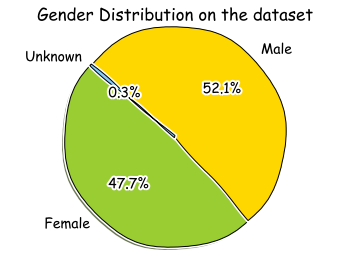

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

with plt.xkcd():
    plt.title("Gender Distribution on the dataset")
    labels = 'Female', 'Male', 'Unknown'
    sizes = [no_of_female,no_of_male,no_of_unknown]
    colors = ['yellowgreen', 'gold', 'lightskyblue']
    #explode = (0.1, 0, 0)  # explode 1st slice

    # Plot

    plt.pie(sizes, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.show()

In [7]:
# Gender Vs Demograph 
# let's compute female first
female_demograph= female_df.groupby('country')
male_demograph = male_df.groupby('country')

In [8]:
# This is data to lookup the country code to plot on the map 
country_df = pd.read_csv("country codes - Sheet1.csv")
country_df.head()

,country,code,lat,lon
0,Afghanistan,AF,33.939110,67.709953
1,Åland Islands,AX,37.062500,-95.677068
2,Albania,AL,41.153332,20.168331
3,Algeria,DZ,28.033886,1.659626
4,American Samoa,AS,-14.270972,-170.132217


In [9]:
import folium
# Create and show the map.
map_female_demo = folium.Map(location=[30, 0], zoom_start=2)
# list that contains the demograoghic reach of female listeners 
female_demography_reach = []
for country_code,count in female_demograph.size().iteritems():
    
    if country_code !="A1" or country_code!="A2"or country_code!="ZZ":
        
        country = country_df[country_df['code']==country_code]['country'].values
        if len(country)!=0:
            female_demography_reach.append(country[0])
        lat = country_df[country_df['code']==country_code]['lat'].values
        lon = country_df[country_df['code']==country_code]['lon'].values
        
        if len(lat)==0 or len(lon)==0:
            continue
        # plot on map with circle marker and popup information
        map_female_demo.circle_marker(location=[lat[0], lon[0]],radius = count*900, 
                                      popup='{}, {}'.format(str(count),str(country)))
# Create and show the map.

print "Click over the circles to popup information "
print
print "Female Users around the world"
map_female_demo
    
       


Click over the circles to popup information 

Female Users around the world


/Users/ArvindRamesh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead


In [10]:
import folium
# Create and show the map.
map_male_demo = folium.Map(location=[30, 0], zoom_start=2)
# list that contains the demograoghic reach of male listeners 
male_demography_reach = []
for country_code,count in male_demograph.size().iteritems():
    if country_code !="A1" or country_code!="A2"or country_code!="ZZ":
        country = country_df[country_df['code']==country_code]['country'].values
        if len(country)!=0:
            male_demography_reach.append(country[0])
        lat = country_df[country_df['code']==country_code]['lat'].values
        lon = country_df[country_df['code']==country_code]['lon'].values
        
        if len(lat)==0 or len(lon)==0:
            continue
        
        # plot on map with circle marker and popup information
        map_male_demo.circle_marker(location=[lat[0], lon[0]],
                                radius = count*900, popup='{}, {}'.format(str(count),str(country)))


print "Click over the circles to popup information "
print
print "Male Users around the world"
map_male_demo
    
       


Click over the circles to popup information 

Male Users around the world


/Users/ArvindRamesh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead


In [11]:
print "Countries that have no female listeners in the dataset"
print list(set(male_demography_reach) - set(female_demography_reach))
print "Countries that have no male listeners in the dataset"
print list(set(female_demography_reach) - set(male_demography_reach))



Countries that have no female listeners in the dataset
[' Israel', ' India', ' Slovenia', ' Liechtenstein', ' Zimbabwe', ' Monaco', ' Russian Federation', ' Japan', ' Malawi']
Countries that have no male listeners in the dataset
[' Puerto Rico', ' Cyprus']


### Certain regions have male only users registered and most of these happen to be countries like Israel, India, Slovenia, Zimbabwe, Russian Federation, Japan and Malawi which do not yet have an active spotify service available ( ref:  https://support.spotify.com/us/learn-more/faq/#!/article/full-list-of-territories-where-spotify-is-available ) . We also notice that there are about two users whose country code represents A1 which is an anonymous proxy with Puerto Rico and Cyprus having no male users in the dataset.

###  A good hypothesis here could be that male are more likely to acess spotify through a VPN than their female counterparts. With that being said, these users may have also misrepresented their gender and age information and drawing such conclusion would not be correct


In [12]:
print "users registered with anonymous proxy"
user_data_sample[user_data_sample['country']=="A1"]


users registered with anonymous proxy


,gender,age_range,country,acct_age_weeks,user_id
5624,female,30 - 34,A1,161,a1b76f781f6d49aa85a5d1eab0bdaecf
8396,male,30 - 34,A1,221,210c01e4f3ce412eb1efe93e6d3c0e68


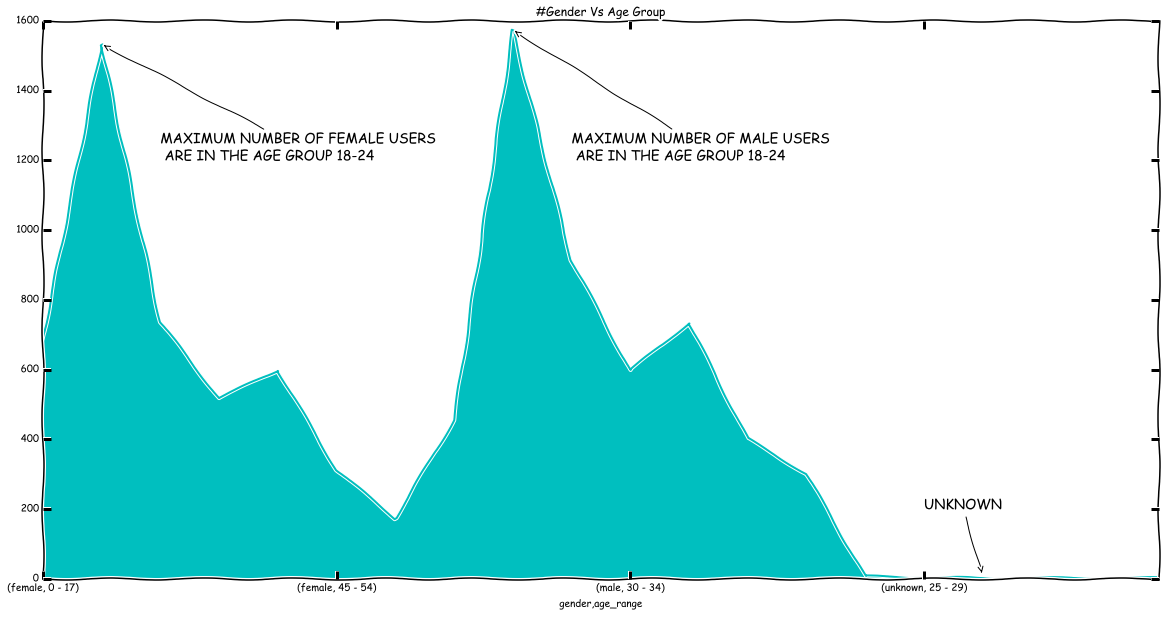

In [15]:
gender_ageRange = user_data_sample.groupby(['gender','age_range']).size()

with plt.xkcd():
    gender_plot = gender_ageRange.plot(kind='area',figsize=(20,10),color='c')
    plt.title("#Gender Vs Age Group")
    gender_plot.annotate('MAXIMUM NUMBER OF FEMALE USERS \n ARE IN THE AGE GROUP 18-24 ',xy =(1,1533),
                         arrowprops=dict(arrowstyle='->'),xytext=(2,1200))
    gender_plot.annotate('MAXIMUM NUMBER OF MALE USERS \n ARE IN THE AGE GROUP 18-24 ',xy =(8,1574),
                         arrowprops=dict(arrowstyle='->'),xytext=(9,1200))
    gender_plot.annotate('UNKNOWN',xy =(16,10),
                         arrowprops=dict(arrowstyle='->'),xytext=(15,200))

## Maximum users in the dataset are in the age-group of 18-24

In [16]:
no_track_id = final_df[final_df['track_id'].isnull()].shape[0] 
print str(no_track_id) + " records have no track id in the dataset"
 

8101 records have no track id in the dataset


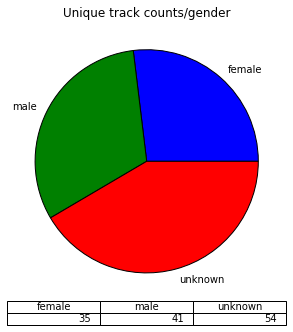

In [17]:
track_count = final_df.groupby(["gender"])['track_id'].apply(lambda x: len(x.unique()))
# normalize for unique tracks / gender
track_count[0] = (track_count[0]/no_of_female)
track_count[1] = (track_count[1]/no_of_male)
track_count[2] = (track_count[2]/no_of_unknown)

track_count.plot(kind=
                 'pie', figsize=(5,5),title="Unique track counts/gender",label="",table=True,mark_right=False)



In [18]:
time_listens = final_df.groupby("gender").agg({'ms_played': [np.sum]})
time_listens['ms_played']['sum']['female'] = time_listens['ms_played']['sum']['female']/no_of_female/1000
time_listens['ms_played']['sum']['male']= time_listens['ms_played']['sum']['male']/no_of_male/1000
time_listens = time_listens.drop('unknown')


/Users/ArvindRamesh/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:3066: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


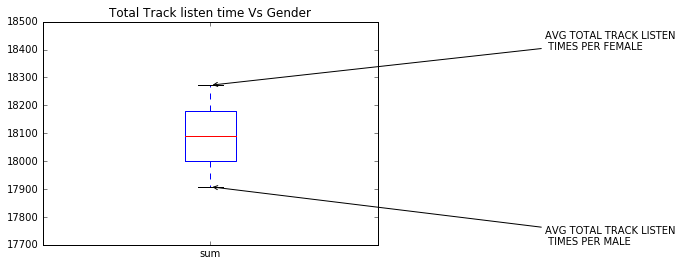

In [19]:
box_plot_sum = time_listens['ms_played']['sum'].plot(kind='box',ylim=(17700,18500),
                                                     title="Total Track listen time Vs Gender")

box_plot_sum.annotate('AVG TOTAL TRACK LISTEN \n TIMES PER FEMALE ',xy =(1,18272),
                    arrowprops=dict(arrowstyle='->'),xytext=(2,18400))
box_plot_sum.annotate('AVG TOTAL TRACK LISTEN  \n TIMES PER MALE', xy=(1,17908),
                     arrowprops=dict(arrowstyle='->'),xytext=(2,17700))

## Though the averge unique track per female is lower than their male counterpart, we notice the female listen to songs longer than male. The average female though subscribed to only 35 songs, listens to about 18272 seconds or 304.53 minutes of music as compared to their male counterparts who listen to 17908 seconds or 298.46 minutes of music. 




In [20]:
# Assuming each song on an average is 5 mins long
print "Average Number of songs listened to per female " + str(304.5/5)
print "Average Number of times a female listens to each song " + str(304.5/5/35)
print "Average Number of songs listened to per male " + str(298.46/5)
print "Average Number of times a male listens to each song " + str(298.46/5/41) 

Average Number of songs listened to per female 60.9
Average Number of times a female listens to each song 1.74
Average Number of songs listened to per male 59.692
Average Number of times a male listens to each song 1.45590243902


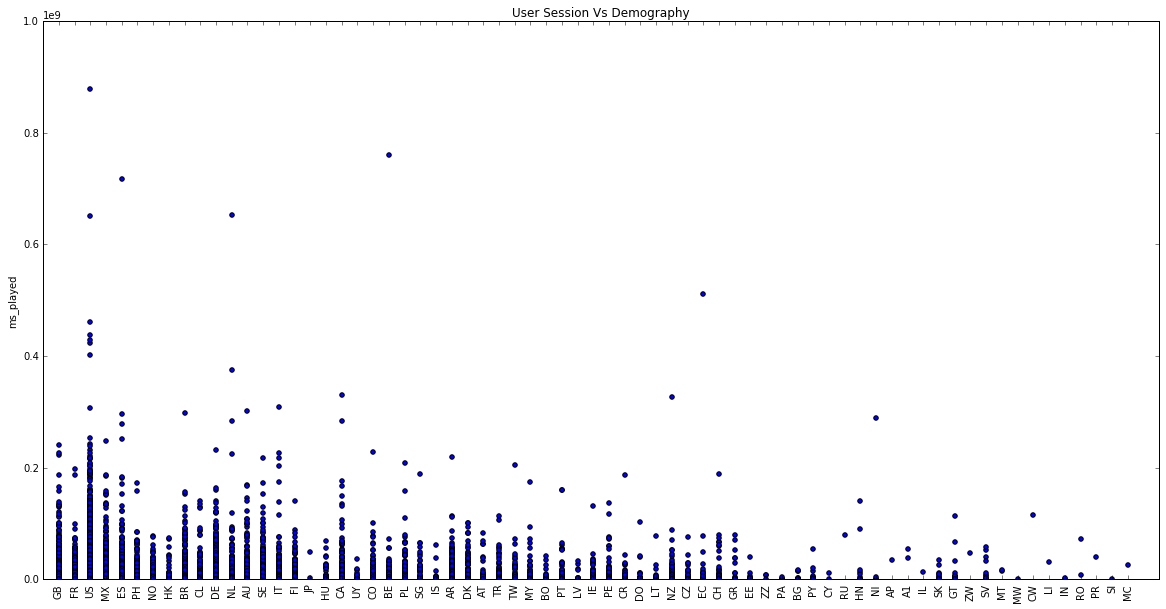

In [21]:
import matplotlib.ticker as plticker
# country vs session length 
session_length = final_df.groupby(["user_id","country"],as_index=False).agg({'ms_played': [np.sum]})
plt.figure(figsize=(20,10))

# store it as a list for scatterplot
country = list(session_length['country'])
sessions = list(session_length['ms_played']['sum'])

# generate unique int for scatter plot for xlabels
labels, levels = pd.factorize(country)
# plots
plt.title("User Session Vs Demography")
plt.scatter(x=labels, y=sessions)
plt.ylabel("ms_played")
plt.ylim(0,1.0*10**9)
plt.xlim(-1, 70)
plt.xticks(range(0,len(levels)),levels,rotation=90)
plt.show()


In [22]:
# country vs session length
from scipy.stats import spearmanr

print "spearman rank order correlation between demography and user session " + str(spearmanr(labels,sessions)[0])

spearman rank order correlation between demography and user session -0.0609859641329


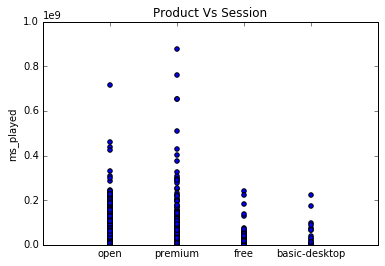

In [23]:

product = final_df.groupby(["user_id","product"],as_index=False).agg({'ms_played': [np.sum]})
# store it as a list for scatterplot
product_list = list(product['product'])
sessions = list(product['ms_played']['sum'])
labels, levels = pd.factorize(product_list)
plt.title("Product Vs Session")
plt.scatter(x=labels, y=sessions)
plt.ylabel("ms_played")
plt.ylim(0,1.0*10**9)
plt.xlim(-1, 4)
plt.xticks(range(0,len(levels)),levels)
plt.show()


In [24]:
print "spearman rank order correlation between product and user session " + str(spearmanr(labels,sessions)[0])

spearman rank order correlation between product and user session 0.14544886345


In [25]:
# correlation between country and product
product_label , product_level = pd.factorize(final_df['product'])
country_label , country_level = pd.factorize(final_df['country'])

print "spearman rank order correlation between product and country " + str(spearmanr(product_label,country_label)[0])


spearman rank order correlation between product and country -0.0309347801521


In [26]:
# correlation between session and context
context_label , context_level = pd.factorize(final_df['context'])

print "spearman rank order correlation between session and context " + str(spearmanr(context_label,
                                                                                     final_df['ms_played'])[0])


spearman rank order correlation between session and context 0.017591545488


In [27]:
# correlation between age and session
age_label , age_level = pd.factorize(final_df['age_range'])

print "spearman rank order correlation between session and context " + str(spearmanr(age_label,
                                                                                     final_df['ms_played'])[0])


spearman rank order correlation between session and context 0.0543873049564


In [28]:
# convert epoch to datetime for easy analysis
import time,pytz
final_df['end_timestamp'] = final_df['end_timestamp'].apply(lambda x : time.strftime('%Y-%m-%d %H:%M:%S',
                                                                                     time.gmtime(x)))
# convert to pandas format so that it does not crib! 
final_df['end_timestamp'] = [pd.to_datetime(d) for d in final_df['end_timestamp']]

In [29]:
# sort by user_id and end_timestamp
sorted_finalDF = final_df.sort_values(['user_id','end_timestamp'],ascending=True)

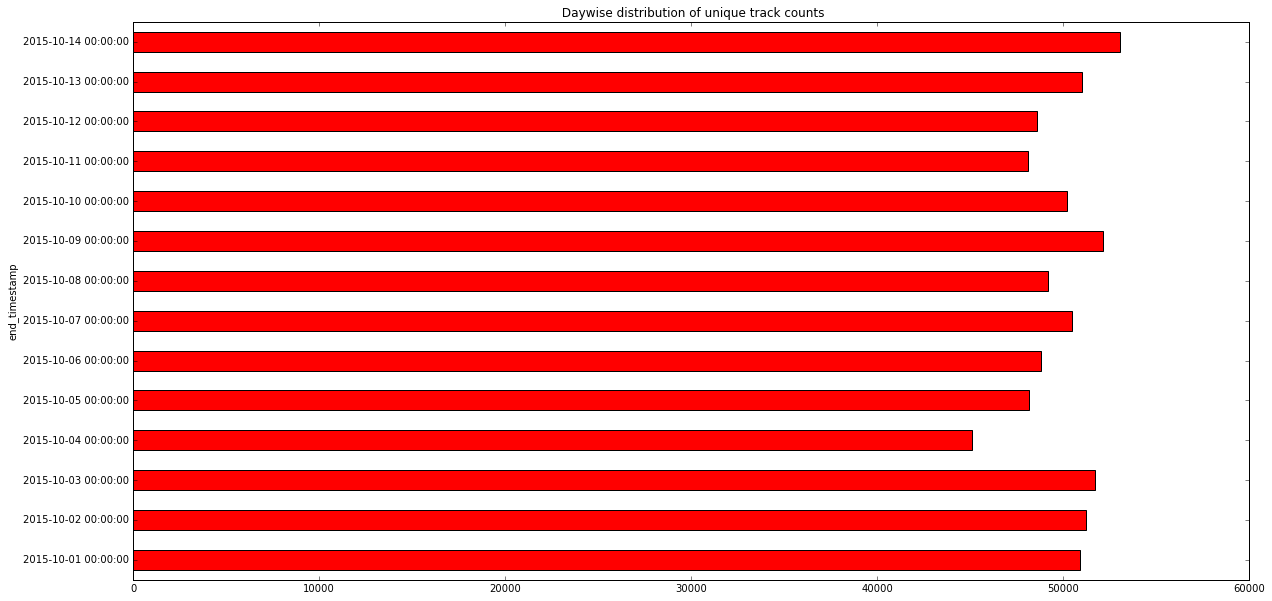

In [30]:
agg_by_day = sorted_finalDF.groupby([pd.TimeGrouper(key="end_timestamp",
                                                    freq='24h')])['track_id'].apply(lambda l: len(l.unique()))

agg_by_day.plot(kind='barh',figsize=(20,10),color='red',title=" Daywise distribution of unique track counts")


In [31]:
sorted_finalDF['weekday'] = sorted_finalDF['end_timestamp'].apply(lambda x: x.weekday())

agg_by_dayOfWeek = sorted_finalDF.groupby(['weekday'])['track_id'].apply(lambda l: len(l.unique()))



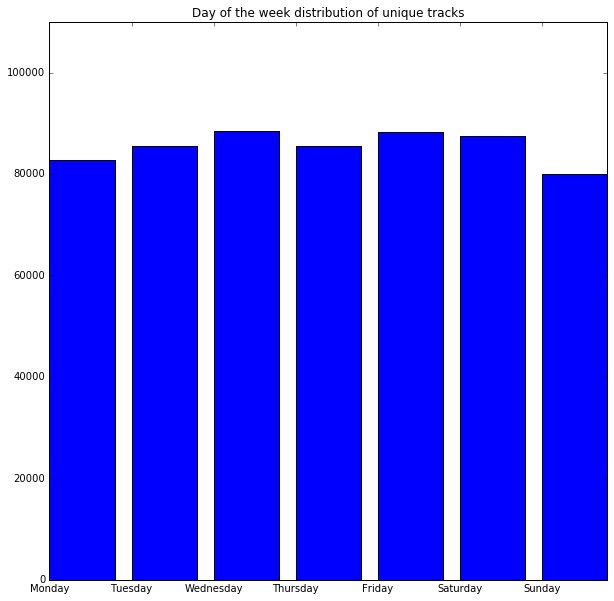

In [32]:
plt.figure(figsize=(10,10))
xticks=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

plt.xticks(range(0,len(xticks)),xticks)
y = []
for i in agg_by_dayOfWeek:
    y.append(i)
plt.bar([0,1,2,3,4,5,6],y)
plt.title("Day of the week distribution of unique tracks")
plt.ylim(0,110000)

plt.show()


In [33]:
times = pd.DatetimeIndex(sorted_finalDF['end_timestamp'])
hour_DF = sorted_finalDF.groupby([times.hour])['track_id'].apply(lambda l: len(l.unique()))

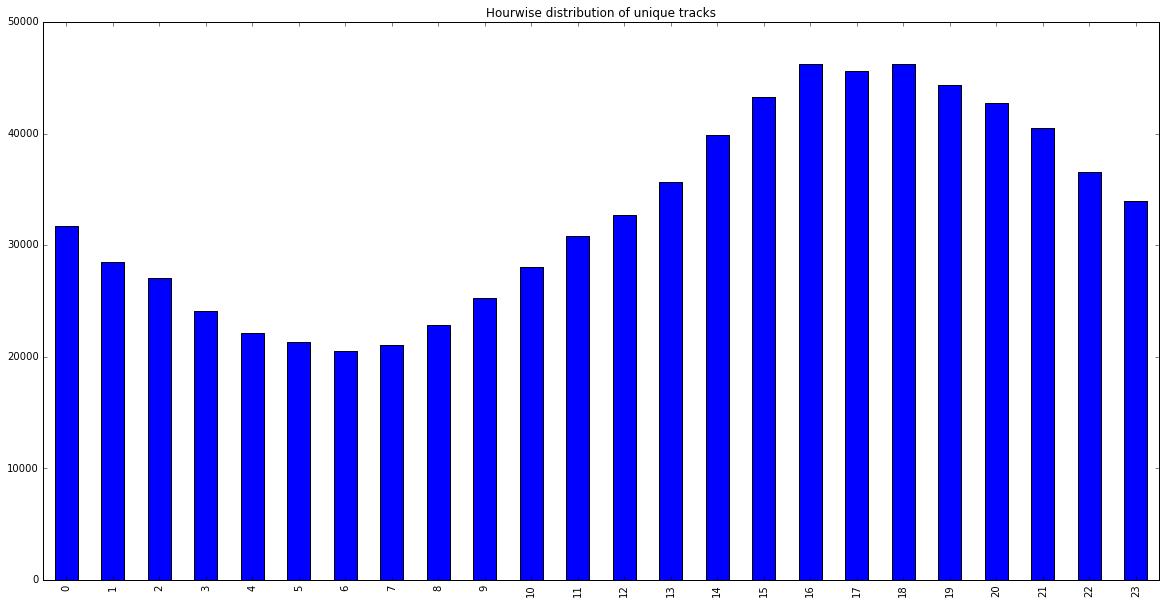

In [34]:
hour_DF.plot(kind='bar',figsize=(20,10),title="Hourwise distribution of unique tracks")

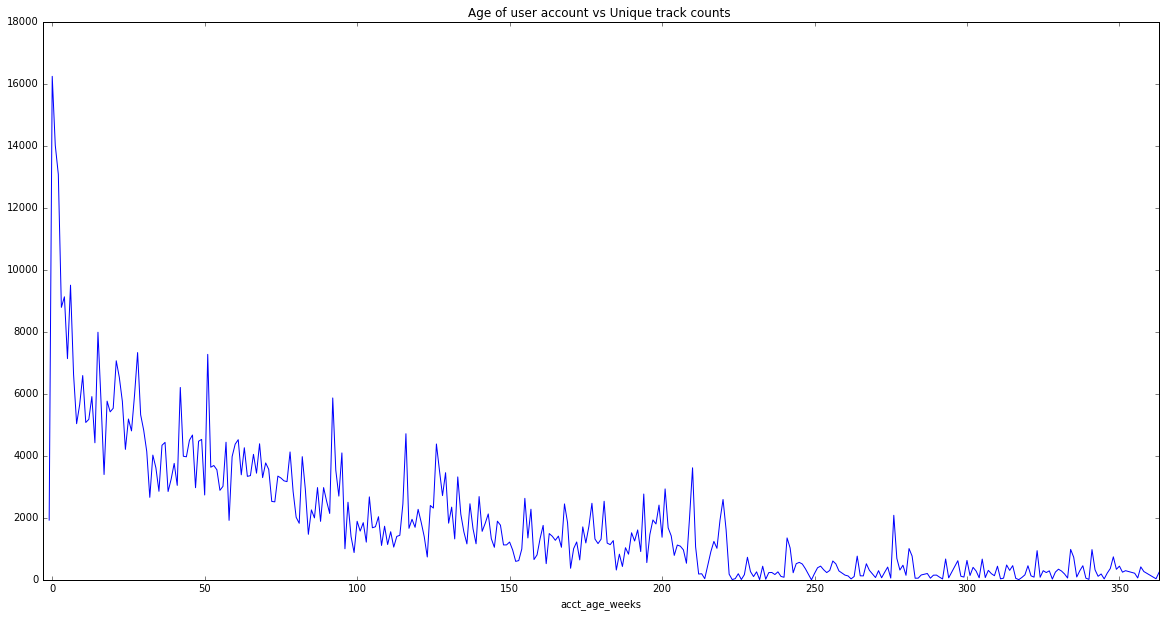

In [35]:
final_df.groupby(['acct_age_weeks'])['track_id'].apply(lambda l: len(l.unique())).plot(kind='line',
                                                    title= "Age of user account vs Unique track counts ", 
                                                                                       figsize=(20,10),xlim=(-3,363))

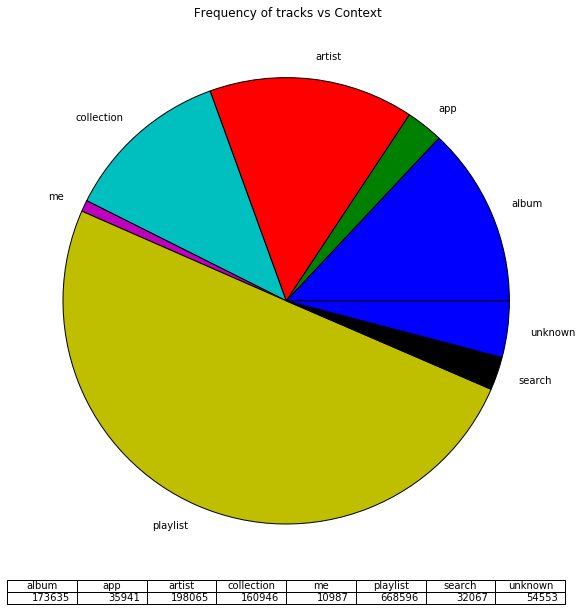

In [36]:
# Product Vs total listens
product = final_df.groupby(['context'])['track_id'].apply(lambda l : (l.count()))
product
product.plot(kind='pie', figsize=(10,10),label="",table=True, title=" Frequency of tracks vs Context")